# Preliminary operations

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
from google.colab import drive
from shutil import copyfile
plt.rcParams['figure.figsize'] = [15,5]

In [ ]:
drive.mount('/content/gdrive', force_remount = True)
copyfile('gdrive/My Drive/DSIM/E04/boat1.jpg', 'boat1.jpg')
copyfile('gdrive/My Drive/DSIM/E04/boat3.jpg', 'boat3.jpg')

Mounted at /content/gdrive


'boat3.jpg'

# Descriptors

Create SIFT, read images and extract descriptors.

In [ ]:
sift = cv.SIFT_create()

In [ ]:
im1 = cv.imread('', cv.IMREAD_GRAYSCALE)
im2 = cv.imread('', cv.IMREAD_GRAYSCALE)

In [ ]:
(kpts1, descriptors1) = sift.detectAndCompute(im1, None)
(kpts2, descriptors2) = sift.detectAndCompute(im2, None)

Match descriptors.

In [ ]:
bf = cv.BFMatcher.create(crossCheck = True)
matches = bf.match(descriptors1, descriptors2)

# Homography matrix

Create homography matrix through RANSAC method, using the coordinates stored in *matches* to find the correspondences between the two sets of keypoints.

In [ ]:
def myHomography(kpts1, kpts2, matches):
  # Create two numpy arrays with 2 dimensions (i.e. matrices)
  # We'll use them to store the coordinates
  src_pts = np.zeros((len(matches), 2), dtype = float)
  dst_pts = np.zeros((len(matches), 2), dtype = float)
  # For each match, search the respective coordinates and store
  # in the previous matrices
  for i in range(len(matches)):
    src_pts[i] = kpts1[matches[i].queryIdx].pt
    dst_pts[i] = kpts2[matches[i].trainIdx].pt
  # Now, compute homography matrix with RANSAC method
  H, mask = cv.findHomography(src_pts, dst_pts, method = cv.RANSAC, ransacReprojThreshold = 4)
  return H

In [ ]:
H = myHomography(kpts1, kpts2, matches)

Let's print the homography matrix.

In [ ]:
H

array([[ 1.75751125e+00, -4.56145550e-04, -9.15373036e+02],
       [ 2.60199800e-01,  1.63490854e+00, -1.83863658e+02],
       [ 9.70820470e-04,  2.45447369e-05,  1.00000000e+00]])

# Warp perspective

Now, we apply the homography matrix to the second image.

In [ ]:
def myWarp(im2, H):
  return cv.warpPerspective(im2, H, (im1.shape[1] + 400, im1.shape[0]), flags = cv.WARP_INVERSE_MAP)

Let's see the result.

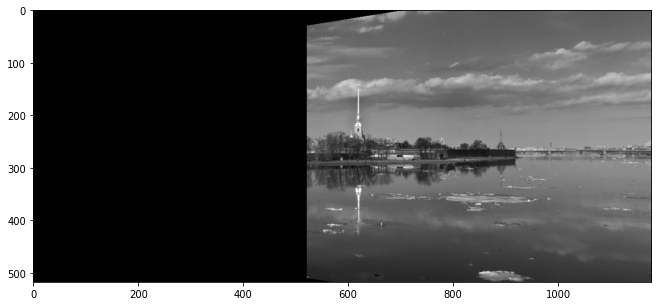

In [ ]:
im3 = myWarp(im2, H)
plt.imshow(im3, cmap = 'gray'); plt.show()

# Collage

Finally, we merge the two images in order to obtain the panorama.

In [ ]:
def myCollage(im3, im1):
  im3[0:im1.shape[0], 0:im1.shape[1]] = im1
  return im3

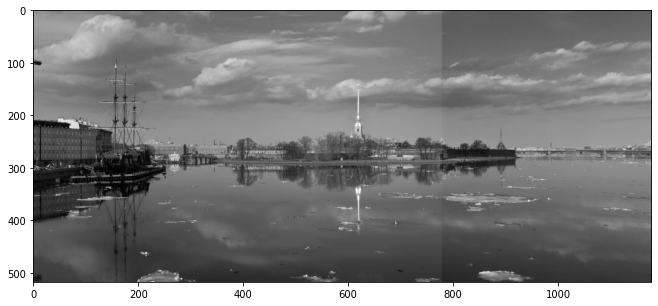

(<matplotlib.image.AxesImage at 0x7f2788f34990>, None)

In [ ]:
im4 = myCollage(im3, im1)
plt.imshow(im4, cmap = 'gray'), plt.show()

The second image seems darker then the first, so we can try to apply a gamma correction in order to increase the brightness.

In [ ]:
# Conversion from 0-255 to 0-1
im4 = im4/255

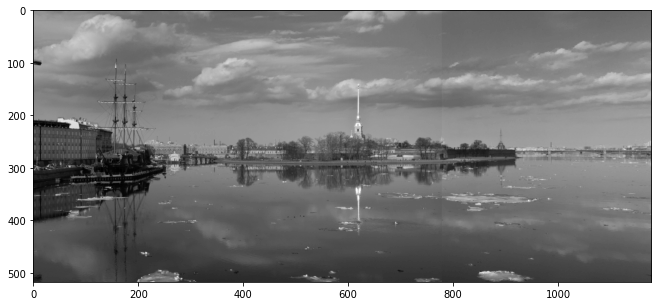

(<matplotlib.image.AxesImage at 0x7f2788d539d0>, None)

In [ ]:
import copy

im5 = copy.deepcopy(im4)
for i in range(778, 1178):
  for j in range(518):
    im5[j][i] = im4[j][i] ** 0.885

plt.imshow(im5, cmap = 'gray'), plt.show()

The image seems more "homogeneous". However, we can still notice the difference between the two images.